# Programação Linear

Aqui está um tutorial para instalar o solver e escrever programas lineares e inteiros:

Parte 1: https://github.com/IBMDecisionOptimization/docplex-examples/blob/master/examples/mp/jupyter/tutorials/Linear_Programming.ipynb

Parte 2: https://github.com/IBMDecisionOptimization/docplex-examples/blob/master/examples/mp/jupyter/tutorials/Beyond_Linear_Programming.ipynb

# Exercício 1 - Modelagem

  Considere a seguinte tabela de informação nutricional de vários
  tipos de alimentos (os preços, calorias, gorduras, proteínas e
  carboidratos são por porção):

  <style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-0pky">Alimento</th>
    <th class="tg-0pky">Preço</th>
    <th class="tg-0pky">Calorias (cal)</th>
    <th class="tg-0pky">Gorduras (g)</th>
    <th class="tg-0pky">Proteínas (g)</th>
    <th class="tg-0lax">Carboidratos (g)</th>
  </tr>
  <tr>
    <td class="tg-0lax">Batata crua</td>
    <td class="tg-0lax">0.14</td>
    <td class="tg-0lax">23</td>
    <td class="tg-0lax">0.1</td>
    <td class="tg-0lax">0.6</td>
     <td class="tg-0lax">6</td>
  </tr>
  <tr>
    <td class="tg-0lax">Batata assada</td>
    <td class="tg-0lax">0.12</td>
    <td class="tg-0lax">171</td>
    <td class="tg-0lax">0.2</td>
    <td class="tg-0lax">3.7</td>
    <td class="tg-0lax">30</td>
  </tr>
  <tr>
    <td class="tg-0lax">Pão</td>
    <td class="tg-0lax">0.20</td>
    <td class="tg-0lax">65</td>
    <td class="tg-0lax">0.0</td>
    <td class="tg-0lax">2.2</td>
    <td class="tg-0lax">13</td>
  </tr>
  <tr>
    <td class="tg-0lax">Cheddar</td>
    <td class="tg-0lax">0.75</td>
    <td class="tg-0lax">112</td>
    <td class="tg-0lax">9.3</td>
    <td class="tg-0lax">7.0</td>
    <td class="tg-0lax">0</td>
  </tr>
  <tr>
    <td class="tg-0lax">Amendoim</td>
    <td class="tg-0lax">0.15</td>
    <td class="tg-0lax">188</td>
    <td class="tg-0lax">16.0</td>
    <td class="tg-0lax">7.7</td>
    <td class="tg-0lax">2</td>
  </tr>
</table>
  

  Você deve montar uma dieta decidindo quantas porções dos alimentos
  comprar de modo que o custo total pago seja minimizado e que
  os seguintes requisitos sejam cumpridos:
 
  - O número de calorias de ser pelo menos $2000$,
  - o total de gordura deve ser pelo menos $50$g
  - o total de proteínas deve ser pelo menbos $100$g,
  - o total de carboidratos deve ser pelo menos $250$g.
  
  O número de porções pode ser um número fracionário (por exemplo,
  você poderia pegar $2.156$ porções de batata).
    
  Escreva um programa linear e resolva usando o solver.

In [169]:
import sys
from docplex.mp.model import Model
m = Model(name='Dieta')

batatacrua = m.continuous_var(name='batatacrua')
batataassada = m.continuous_var(name='batataassada')
pao = m.continuous_var(name='pao')
cheddar = m.continuous_var(name='cheddar')
amendoim = m.continuous_var(name='amendoim')

# write constraints
# constraint #1:
m.add_constraint(23*batatacrua + 171*batataassada + 65*pao + 112*cheddar + 188*amendoim >= 2000)

# constraint #2:
m.add_constraint(0.1*batatacrua + 0.2*batataassada + 9.3*cheddar + 16*amendoim >= 50)

# constraint #3:
m.add_constraint(0.6*batatacrua + 3.7*batataassada + 2.2*pao + 7*cheddar + 7.7*amendoim >= 100)

# constraint #4:
m.add_constraint(6*batatacrua + 30*batataassada + 13*pao + 2*amendoim >= 250)

m.minimize(0.14*batatacrua + 0.12*batataassada + 0.2*pao + 0.75*cheddar + 0.15*amendoim)

m.print_information()

s = m.solve()

print("\nResultado: \n")

m.print_solution()


Model: Dieta
 - number of variables: 5
   - binary=0, integer=0, continuous=5
 - number of constraints: 4
   - linear=4
 - parameters: defaults

Resultado: 

objective: 2.318
  batataassada=7.715
  amendoim=9.280


# Exercício 2 - Set cover

## Problema: **Set Cover** 

Entrada: $m,n, (S_1,..., S_n) , w$, onde $\bigcup_{i=1}^n S_i = \{1,2,\dotsc, m\}$ e $w$ é um vetor de custos positivos de tamanho $n$.

Objetivo: Encontrar $I\subseteq \{1,\dotsc n\}$ tal que $\bigcup_{i\in I}S_i = \{1,\dotsc, m\}$ de modo a minimizar $\sum_{i\in I}w_i$.

(a) Faça uma função `set_cover_int(m,n, S, w)` que cria e resolve o programa **inteiro** para Set Cover (use o solver). `S` é uma lista formada de $n$ listas e $w$ é uma lista de tamanho $n$. (Veja o que o gerador aleatório devolve).

(b) Faça uma função `set_cover_relax(m,n, S, w)` que cria e resolve o programa linear que é uma relaxação para Set Cover.

(c) Faça testes com as funções acima e o gerador aleatório verificando a diferença de tempo de execução e dos valores ótimos encontrados. Deixe as suas execuções rodadas aqui no notebook. De preferência, inclua um gráfico com os resultados obtidos. Escreva um parágrafo (em Markdown) analisando os resultados obtidos.

In [170]:
# Gerador aleatório

import random as rd

def geraAleatorio(p, mincost, maxcost,n, m): 
    # p deve ser um numero de 0 a 1. Os conjuntos terao tamanho esperado p*m
    # mincost = menor custo possivel, maxcost = maior custo possivel
    w = [rd.randint(mincost,maxcost) for i in range(0, n)]
    S = []
    inc = m*[0]
    for i in range (0,n):
        C = []
        for j in range(1,m+1):
            if p > rd.random():
                C.append(j)
                inc[j-1] = 1
        S.append(C)
    for j in range(0,m):
        if inc[j]==0:
            i = rd.randint(0,n-1)
            S[i].append(j+1)
    # checagem
    chec = m*[0]
    for i in range(0,n):
        for j in S[i]:
            chec[j-1]=1
    for j in range(0,m):
        if chec[j]==0:
            print("Erro",str(j+1),"nao foi incluido em nenhum conjunto")
    return (m,n,S,w)
   
# Exemplo de uso
m,n,S,w = geraAleatorio(0.2, 1,5, 10, 20)

print(m,"\n",n,"\n",S,"\n",w)

20 
 10 
 [[5, 6, 9, 11, 13, 17, 18, 19], [6, 10, 18], [1, 3, 6, 14, 15, 16], [10, 18, 20], [4, 5, 7, 19], [12, 17, 18], [5, 7, 8, 14, 16], [7, 13, 15], [15, 19], [4, 8, 13, 17, 2]] 
 [5, 5, 4, 4, 1, 1, 5, 4, 5, 5]


(a) Faça uma função `set_cover_int(m,n, S, w)` que cria e resolve o programa **inteiro** para Set Cover (use o solver). `S` é uma lista formada de $n$ listas e $w$ é uma lista de tamanho $n$. (Veja o que o gerador aleatório devolve).


In [154]:
# caso não tenha pulp instalado
# !pip3 install pulp

In [155]:
from pulp import * 

import time

def set_cover_int(m,n,S,w):
    
    big_set = set(range(1,m+1))
    
    prob = LpProblem("SetCover", LpMinimize)    
    
    # Variables
    Rows = range(len(S))    
    choices = LpVariable.dicts("Choice",(Rows) ,0,1,LpInteger)         
    
    obj = 0
    
    for i in Rows:        
        obj+= choices[i]*w[i] #
        
    # Objective
    prob += obj
    
    # Constraints    
    for element in big_set:  
        l = [choices[i] for i in Rows if element in S[i]]                      
        prob += sum(l) >= 1, ""     
    status = prob.solve()    
    res = []
    for i in Rows:        
            res.append({'i':i , 'Xi':value(choices[i])}) 
    sets_selectionned = [S[r['i']] for r in res if r['Xi']==1 ]
    
    return sets_selectionned , value(obj)

In [156]:
CoveredSets, ObjValue = set_cover_int(m,n,S,w)
print("CoveredSets :", CoveredSets,"\nObjective Value : ", ObjValue)

CoveredSets : [[20], [3, 6, 8, 13, 14, 17, 19], [4, 9, 12, 13, 16, 10, 11], [3, 6, 7, 12, 13, 15], [1, 13, 15, 16], [3, 8, 12, 14, 2], [5, 13, 16, 17, 18]] 
Objective Value :  15.0


(b) Faça uma função `set_cover_relax(m,n, S, w)` que cria e resolve o programa linear que é uma relaxação para Set Cover.


In [157]:
def set_cover_relax(m,n, S, w):
    
    big_set = set(range(1,m+1))
    
    prob = LpProblem("SetCover", LpMinimize)    
    
    # Variables
    Rows = range(len(S))    
    choices = LpVariable.dicts("Choice",(Rows) ,0,1,LpContinuous)         
    
    obj = 0
    
    for i in Rows:        
        obj+= choices[i]*w[i] #
        
    # Objective
    prob += obj
    
    # Constraints    
    for element in big_set:  
        l = [choices[i] for i in Rows if element in S[i]]                      
        prob += sum(l) >= 1, ""     
    status = prob.solve()    
    res = []
    for i in Rows:        
            res.append({'i':i , 'Xi':value(choices[i])}) 
    sets_selectionned = [S[r['i']] for r in res if r['Xi'] > 0 ]
    
    return sets_selectionned , value(obj), res

In [158]:
CoveredSets, ObjValue, choices = set_cover_relax(m,n,S,w)
print("CoveredSets :", CoveredSets,"\n\nObjective Value : ", ObjValue, "\n\nPercentage of each Set: ", choices)

CoveredSets : [[1, 7, 17], [20], [3, 6, 8, 13, 14, 17, 19], [4, 9, 12, 13, 16, 10, 11], [3, 6, 7, 12, 13, 15], [1, 13, 15, 16], [3, 8, 12, 14, 2], [5, 13, 16, 17, 18]] 

Objective Value :  15.0 

Percentage of each Set:  [{'i': 0, 'Xi': 0.5}, {'i': 1, 'Xi': 1.0}, {'i': 2, 'Xi': 1.0}, {'i': 3, 'Xi': 1.0}, {'i': 4, 'Xi': 0.0}, {'i': 5, 'Xi': 0.5}, {'i': 6, 'Xi': 0.5}, {'i': 7, 'Xi': 1.0}, {'i': 8, 'Xi': 1.0}, {'i': 9, 'Xi': 0.0}]


(c) Faça testes com as funções acima e o gerador aleatório verificando a diferença de tempo de execução e dos valores ótimos encontrados. Deixe as suas execuções rodadas aqui no notebook. De preferência, inclua um gráfico com os resultados obtidos. Escreva um parágrafo (em Markdown) analisando os resultados obtidos.

In [159]:
# exercicio c
import matplotlib.pyplot as plt

time_setcover = []
time_setcoverrelax =[]
dif_ObjValue = []
#Lembrando que valor objetivo da relaxacao <= valor objetivo inteiro

for i in range (100):
    #gerando grafo aleatorio
    m,n,S,w = geraAleatorio(0.2, rd.randint(1,5),rd.randint(5,10), rd.randint(10,20), rd.randint(21,100))

    #Tempo do Set Cover Inteiro
    start = time.time()    
    CoveredSets, ObjValue1 = set_cover_int(m,n,S,w)
    end = time.time()
    elapsed = end - start
    time_setcover.append(elapsed)

    #Tempo do Set Cover Relaxation
    start = time.time()    
    CoveredSets, ObjValue2, choices = set_cover_relax(m,n,S,w)
    end = time.time()
    elapsed = end - start
    time_setcoverrelax.append(elapsed)

    dif_ObjValue.append(ObjValue1 - ObjValue2)

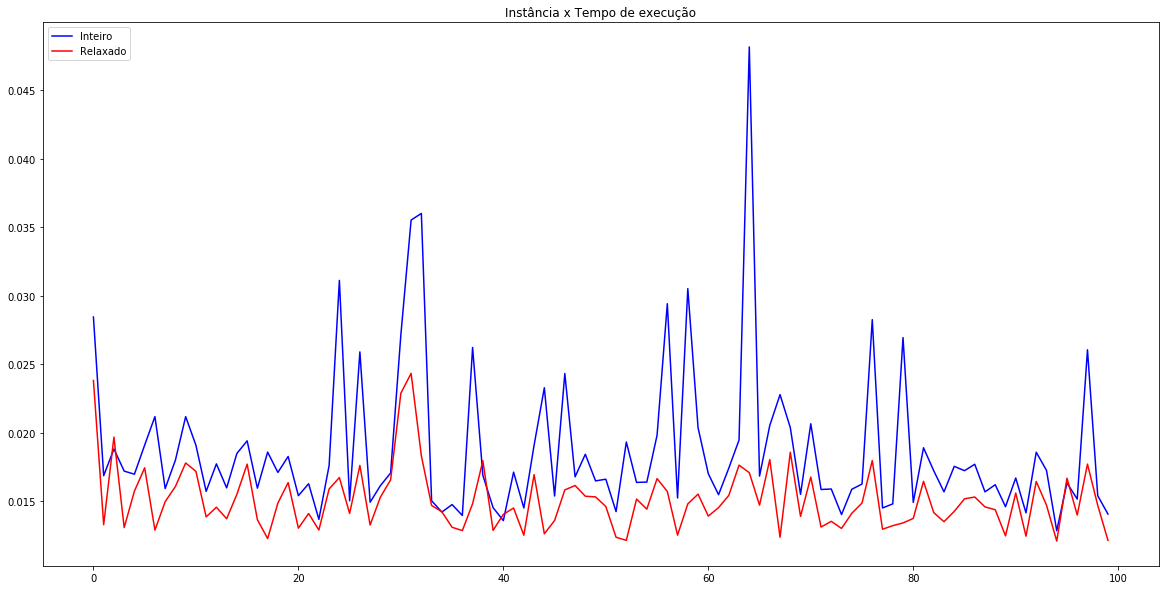

In [160]:
plt.figure(figsize=(20,10))
plt.plot(time_setcover,'b-', label = "Inteiro")
plt.plot(time_setcoverrelax,'r-', label = "Relaxado")
plt.title("Instância x Tempo de execução")
plt.legend(loc='upper left')
plt.show()

# Pela análise do gráfico podemos ver que a versão relaxada teve desempenho melhor em quase todas as instâncias e em algumas delas o depempenho da versão inteira foi muito pior do que o desempenho da versão relaxada.

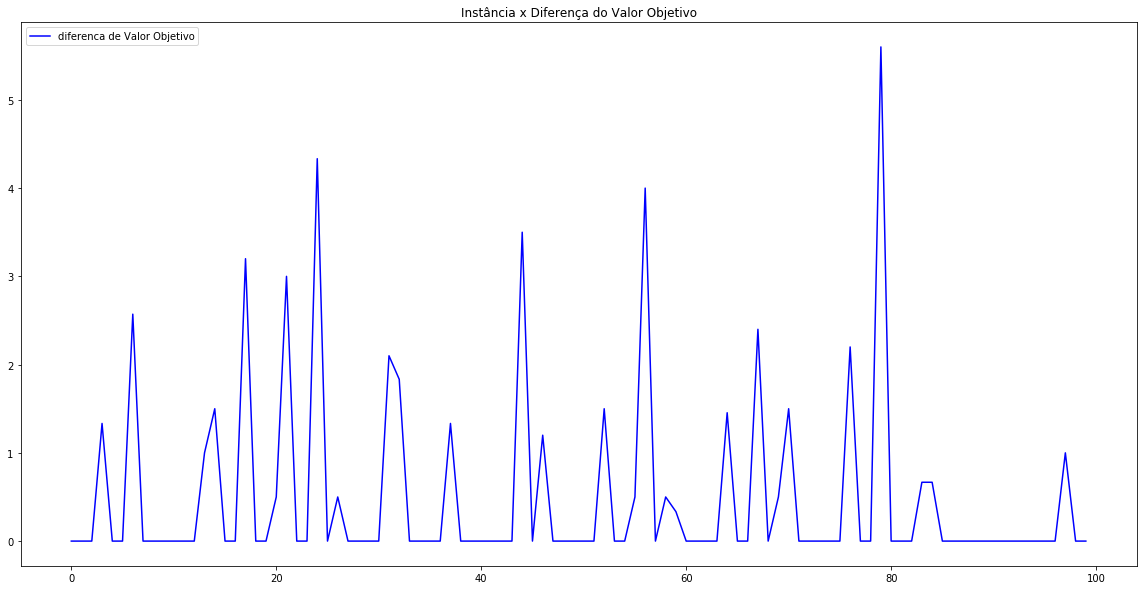

In [161]:
plt.figure(figsize=(20,10))
plt.plot(dif_ObjValue,'b-', label = "diferenca de Valor Objetivo")
plt.legend(loc='upper left')
plt.title("Instância x Diferença do Valor Objetivo")
plt.show()

# Pela análise desse gráfico podemos ver que para aproximadamente metade dos casos testados o valor objetivo encontrado foi o mesmo para a versão relaxada e para a versão inteira. E a maior diferença encontrada foi igual à $6$. Lembrando que o valor objetivo da versão relaxada é no máximo o valor objetivo da versão inteira.

# Exercício 3 - Algoritmo probabilístico para Set Cover

Implemente a estratégia probabilística vista em sala utilizando a função implementada em 2(b).

Faça testes utilizando o gerador aleatório e verificando diferença de tempo de execução do algoritmo com a função de 2(a) e os valores ótimos. De preferência, inclua um gráfico com os resultados obtidos. Escreva um parágrafo (em Markdown) analisando os resultados obtidos.

In [194]:
def set_cover_prob(m,n, S, w):
    
    sets_selectionned = []
    obj = 0
    
    for i in range(n):
        
        p = rd.random()
        while p == 0:
            p = rd.random()

        x = set(range(1,11))

        if rd.randint(1,11) <= p*10:
            sets_selectionned.append(S[i])
            obj+= w[i]
            
    
    return sets_selectionned, obj 

In [195]:
CoveredSets, obj = set_cover_prob(m,n,S,w)
print("CoveredSets :", CoveredSets, "Valor Objetivo:", obj)

CoveredSets : [[1, 3, 7, 15, 24, 35, 37, 40, 49, 55, 68], [1, 5, 18, 23, 26, 30, 52, 55, 67, 68], [1, 3, 8, 9, 13, 23, 32, 36, 42, 46, 49, 54, 59, 61, 63, 70], [1, 2, 4, 14, 15, 22, 28, 36, 38, 39, 43, 46, 57, 62, 48]] Valor Objetivo: 17


In [196]:
time_setcover = []
time_setcoverprob =[]
ObjValue_inteiro = []
ObjValue_prob = []

for i in range (100):
    #gerando grafo aleatorio
    m,n,S,w = geraAleatorio(0.2, rd.randint(1,5),rd.randint(5,10), rd.randint(10,20), rd.randint(21,100))

    #Tempo do Set Cover Inteiro
    start = time.time()    
    CoveredSets, ObjValue1 = set_cover_int(m,n,S,w)
    end = time.time()
    elapsed = end - start
    time_setcover.append(elapsed)
    ObjValue_inteiro.append(ObjValue1)

    #Tempo do Set Cover Probabilistico
    start = time.time()    
    CoveredSets, ObjValue2 = set_cover_prob(m,n,S,w)
    end = time.time()
    elapsed = end - start
    time_setcoverprob.append(elapsed)
    ObjValue_prob.append(ObjValue2)

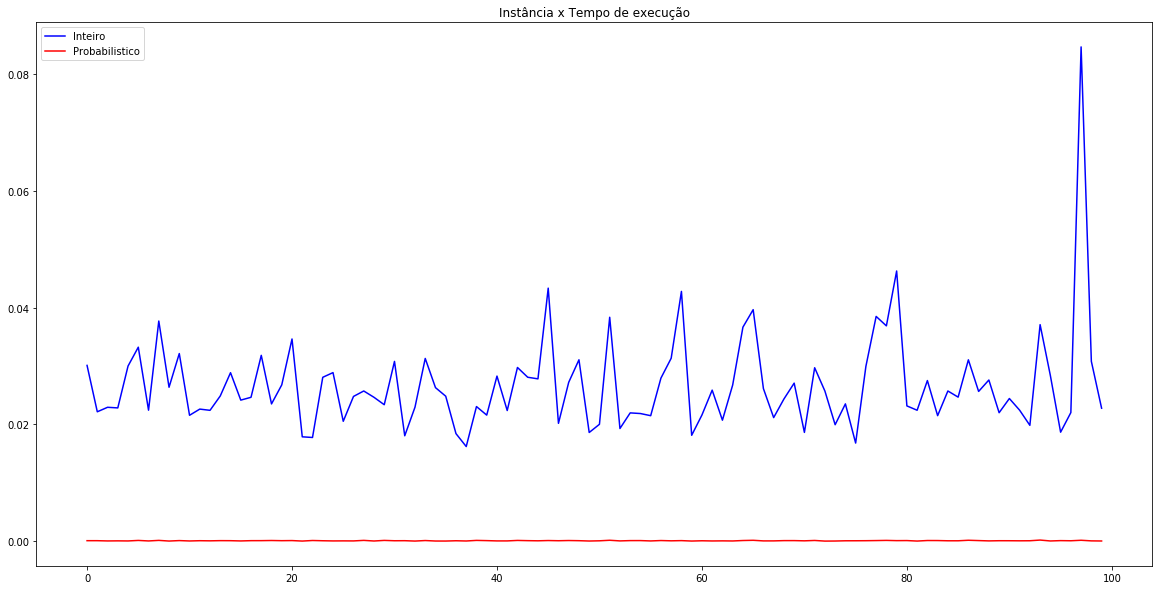

In [197]:
plt.figure(figsize=(20,10))
plt.plot(time_setcover,'b-', label = "Inteiro")
plt.plot(time_setcoverprob,'r-', label = "Probabilistico")
plt.title("Instância x Tempo de execução")
plt.legend(loc='upper left')
plt.show()

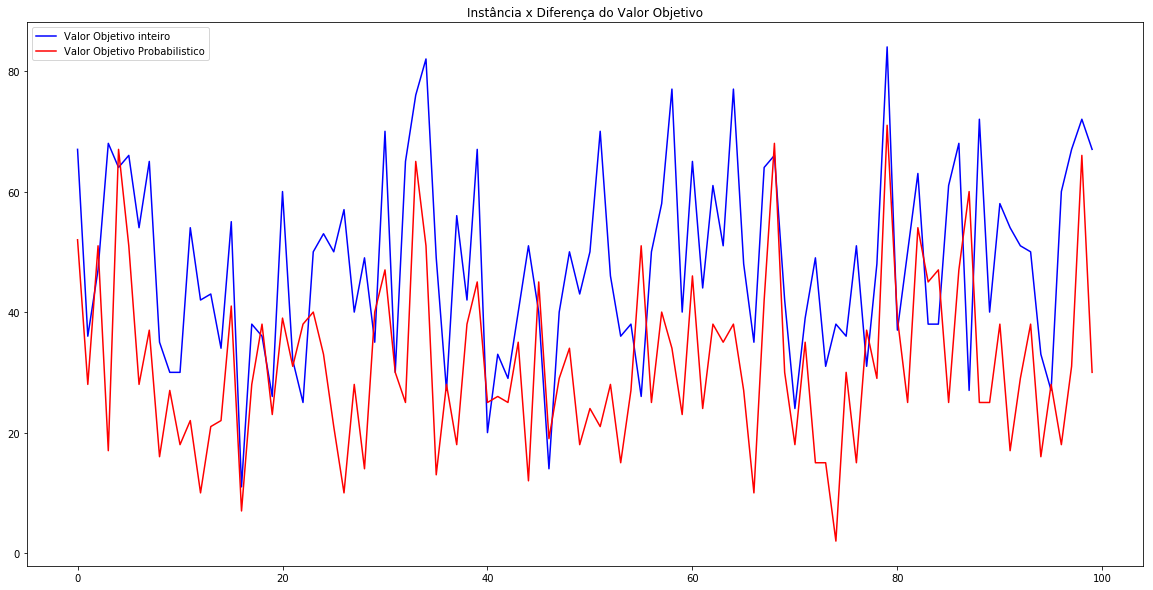

In [198]:
plt.figure(figsize=(20,10))
plt.plot(ObjValue_inteiro,'b-', label = "Valor Objetivo inteiro")
plt.plot(ObjValue_prob,'r-', label = "Valor Objetivo Probabilístico")
plt.legend(loc='upper left')
plt.title("Instância x Diferença do Valor Objetivo")
plt.show()

## Como a versão probabilística executa sempre os mesmos passos independente da estrada seu tempo de execução é constante e muito melhor que o tempo do Set Cover inteiro. Já em relação ao valor objetivo vemos que não ficou muito distante da versão inteira e quase em todos os casos foi inferior, se aproximando bastante da versão relaxada. Lembrando que este algoritmo pode não cobrir o conjunto.